In [1]:
#AR try1

from pandas import read_csv
from matplotlib import pyplot
import pandas as pd
dar = pd.read_excel('data_finale_master.xlsx', index_col=0)

            total charge
date                    
2018-07-10      61369.14
2018-08-10       7800.00
2018-10-14      35700.10
2018-10-21      38946.86
2018-10-28      84771.08


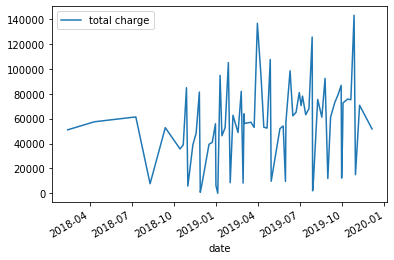

In [2]:
print(dar.head())
dar.plot()
pyplot.show()

In [3]:
from pandas import concat
from pandas import DataFrame
values = DataFrame(dar.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000 -0.228993
t+1 -0.228993  1.000000


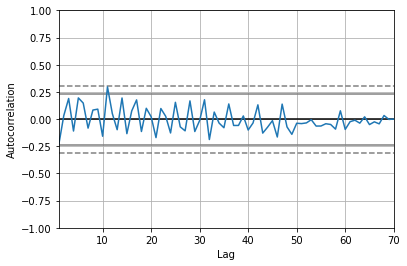

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dar)
pyplot.show()

In [5]:
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-23], X[len(X)-23:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [6]:
# persistence model
def model_persistence(x):
	return x

In [7]:
# walk-forward validation
from sklearn.metrics import mean_squared_error
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)

Test MSE: 3284512826.836


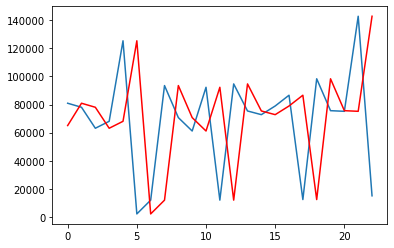

In [8]:
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

In [35]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
# split dataset
X = dar.values
train, test = X[1:len(X)-14], X[len(X)-14:]
# train autoregression
model = AutoReg(train, lags=8)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: [ 5.26324017e+04 -2.68558825e-01 -1.42918566e-01  1.69192609e-01
  6.36083141e-02  2.16537990e-01  3.71702461e-02 -6.02027917e-03
 -4.54155124e-02]


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
mae=mean_absolute_error(test, predictions)
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)

predicted=48188.705516, expected=61156.970000
predicted=48008.535108, expected=92314.920000
predicted=49574.531434, expected=11922.940000
predicted=60095.737112, expected=94711.280000
predicted=59217.218416, expected=75434.680000
predicted=51540.953655, expected=72816.920000
predicted=51161.602322, expected=78986.350000
predicted=54385.840891, expected=86658.250000
predicted=55579.885233, expected=12325.980000
predicted=54445.550761, expected=98374.260000
predicted=53271.603810, expected=75651.700000
predicted=53316.097293, expected=75196.180000
predicted=54126.138318, expected=142921.590000
predicted=54360.766457, expected=15000.000000
Test RMSE: 39181.490
Test MAE: 34766.527


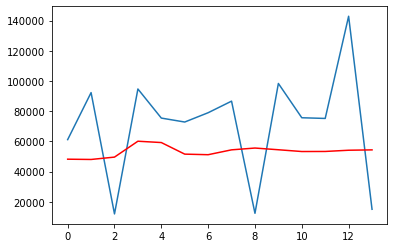

In [37]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()